*Jose Ponce 19092*

*Alejandra Gudiel 19232*

*Gabriel Quiroz 19255*

# Hoja De Trabajo 2 Clustering

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.preprocessing
import numpy as np
import random
import pyclustertend 
import plotly.express as px
import seaborn as sb
import sklearn.cluster as cluster



In [3]:
movies = pd.read_csv("movies.csv", encoding='ISO-8859-1')


### Pregunta 1 : Haga el preprocesamiento del dataset, explique qué variables no aportan información a la generación de grupos y por qué. Describa con qué variables calculará los grupos.


**Primero, estas son las variables que no aportan información a la generación de grupos, esto ya que son cualitativas por lo que las descartamos inicialmente**

In [4]:
#se seleccionan y se muestran las variables cualitativas que no aportaran en la creacion de los grupos
variables_cualitativas = movies.select_dtypes(exclude=[np.number])
for col in variables_cualitativas.columns:
    print(col)

genres
homePage
productionCompany
productionCompanyCountry
productionCountry
video
director
actors
actorsPopularity
actorsCharacter
originalTitle
title
originalLanguage
releaseDate
castWomenAmount
castMenAmount


**Luego se realiza un diagrama de dispersion para las variables cuantitativas y de esta manera determinar cuales tienen correlacion y nos seran de utilidad, asi como tambien para analizar percentiles de valores parecidos con el diagrma de cajas y bigotes, por lo que al analizar la informacion, las variables que no aportan informacion son id, productionCountriesAmount, productionCoAmount, genresAmount, popularity y actorsAmount.**

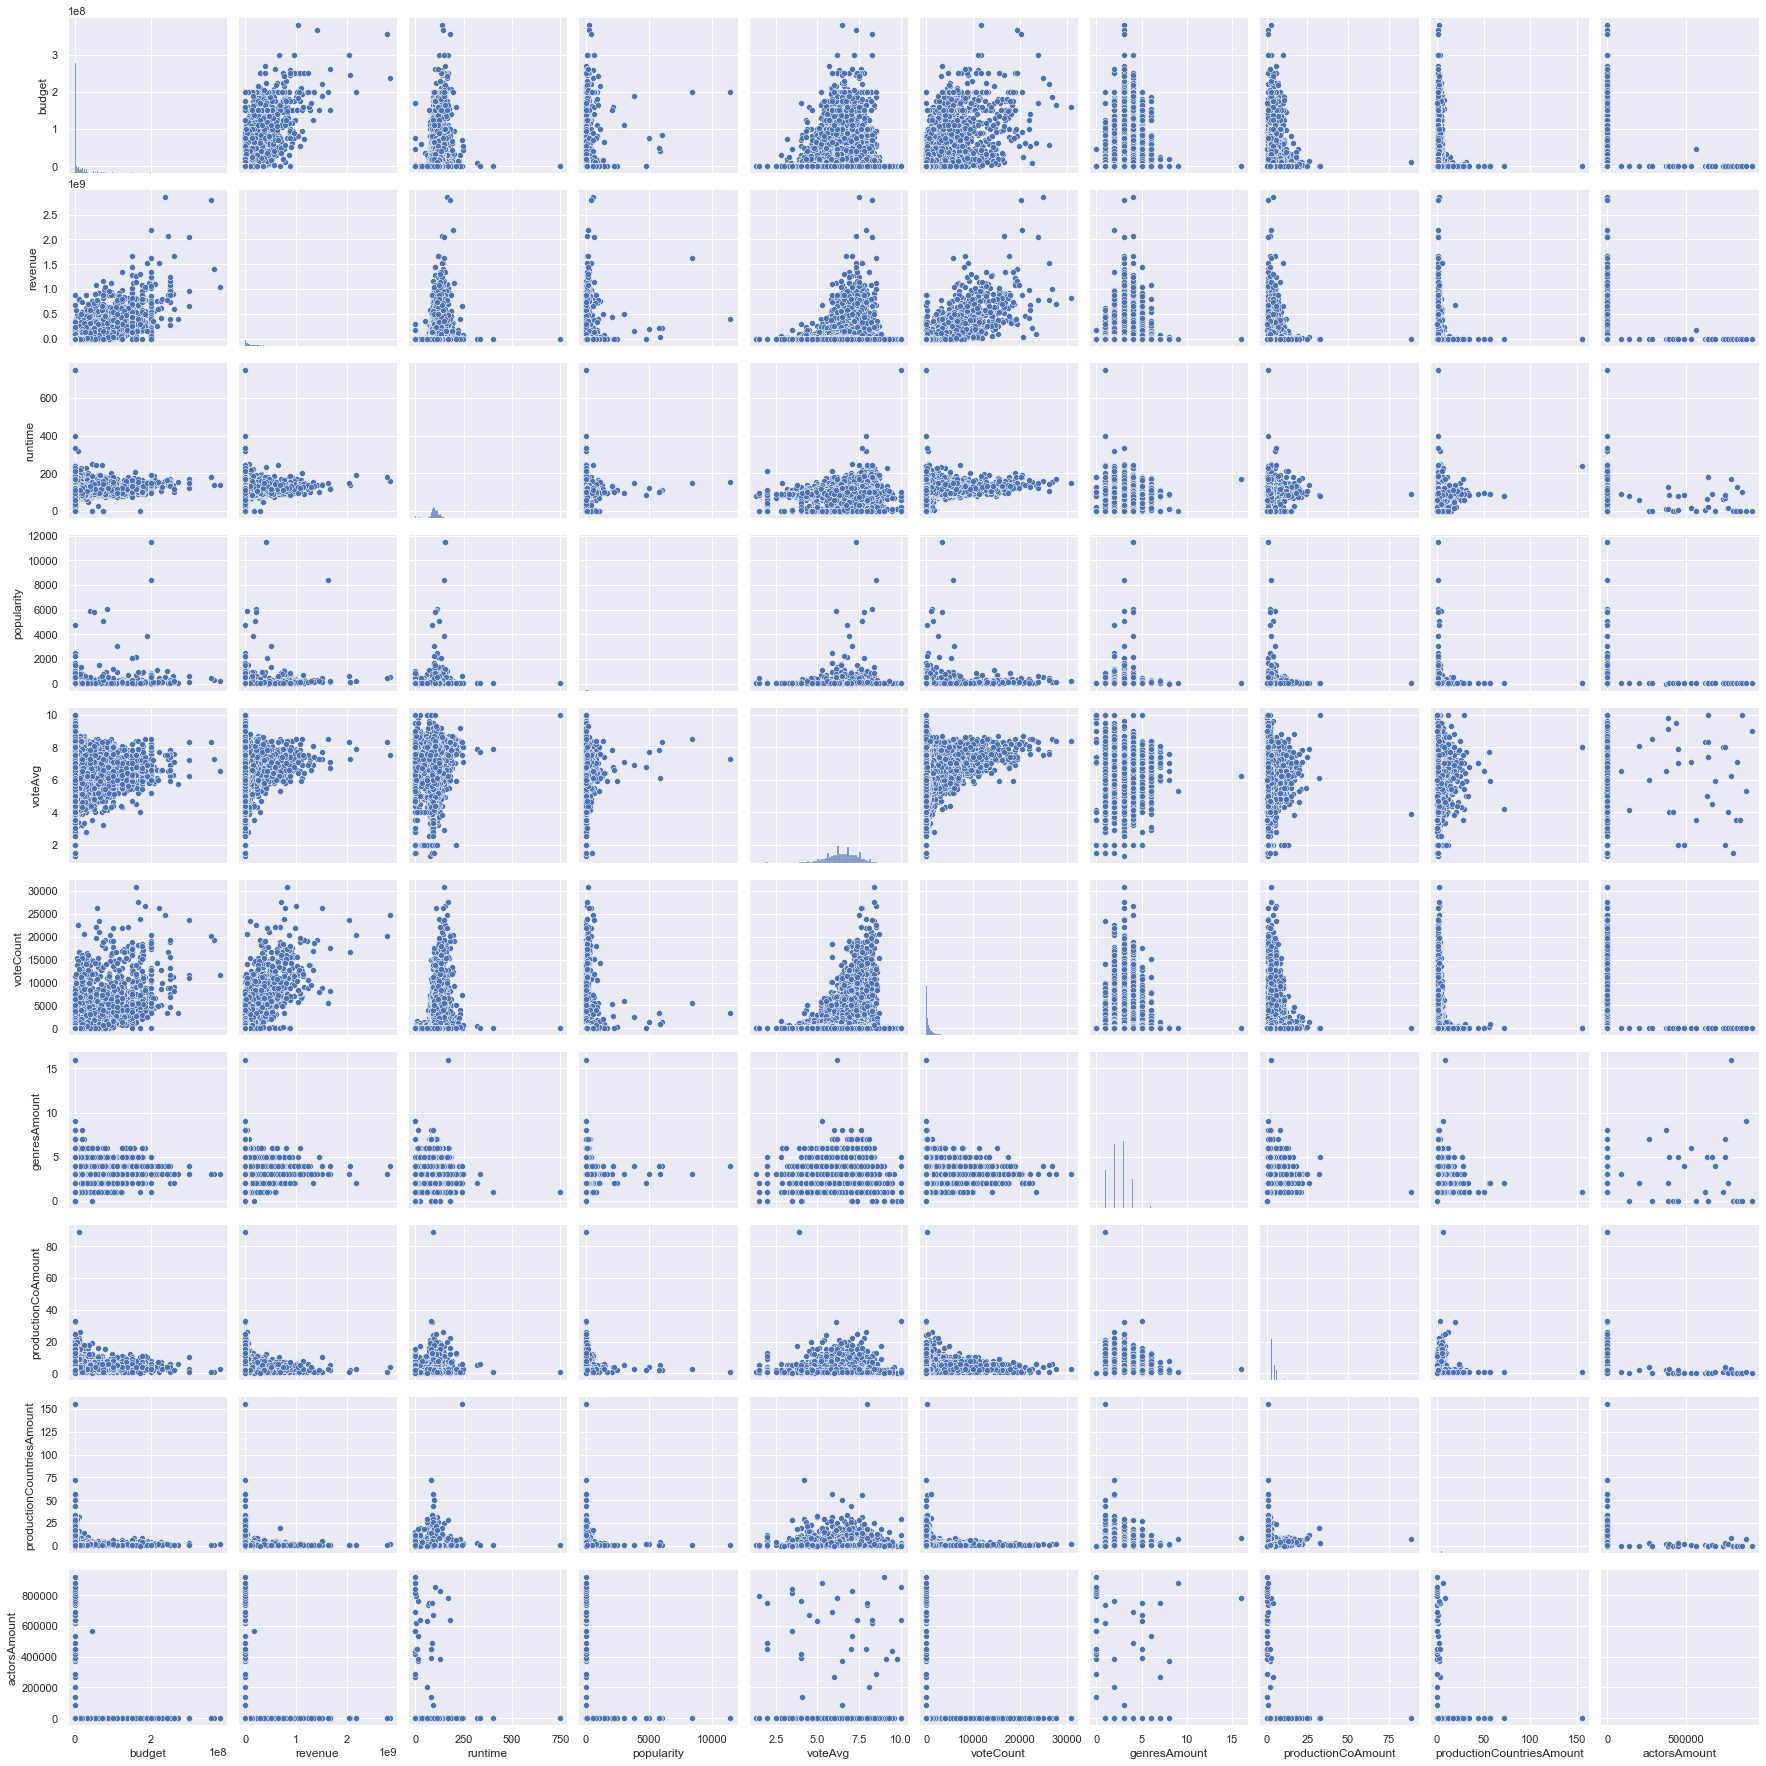

In [63]:
sb.pairplot(movies,vars=["budget","revenue","runtime","popularity","voteAvg","voteCount","genresAmount", "productionCoAmount", "productionCountriesAmount", "actorsAmount"])


<AxesSubplot:>

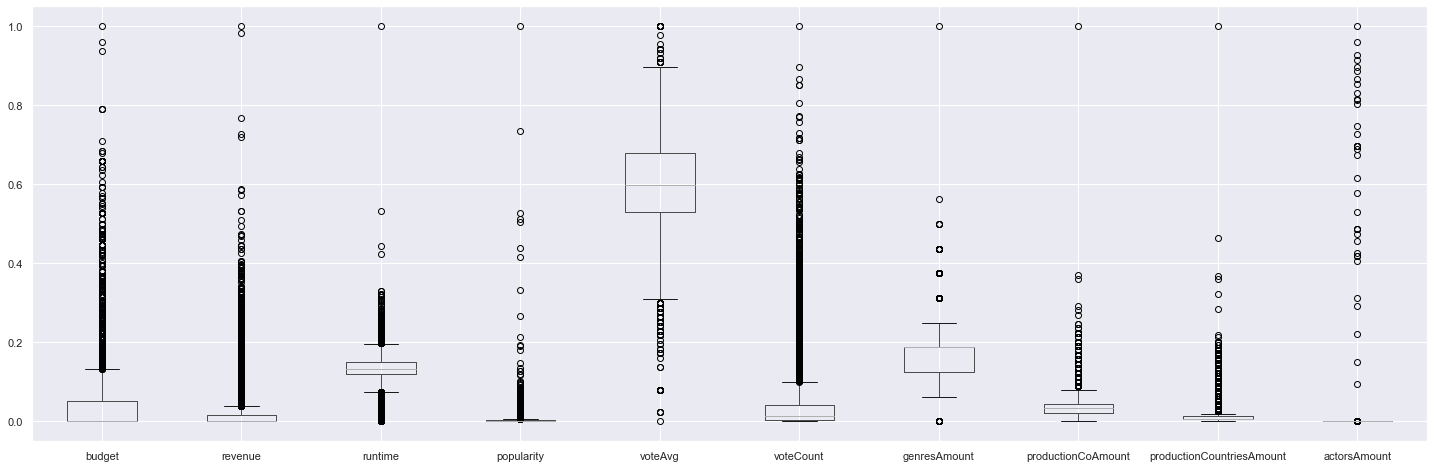

In [5]:
variables_cuantitativas = movies._get_numeric_data()
variables_cuantitativas_normalizadas=(variables_cuantitativas-variables_cuantitativas.min())/(variables_cuantitativas.max()-variables_cuantitativas.min())
sb.set(rc={'figure.figsize':(25,8)})
variables_cuantitativas_normalizadas.boxplot(column=["budget","revenue","runtime","popularity","voteAvg","voteCount","genresAmount", "productionCoAmount", "productionCountriesAmount", "actorsAmount"])  


**Por ultimo se muestran las variables que si aportan informacion y se utilizaran para calcular los grupos.**

In [6]:
#Se eliminan de la muestra las variables que no seran de utilidad segun los diagramas de dispersion y el diagrama de cajas
movies.drop('id', inplace=True, axis=1)
movies.drop('productionCountriesAmount', inplace=True, axis=1)
movies.drop('productionCoAmount', inplace=True, axis=1)
movies.drop('genresAmount', inplace=True, axis=1)
movies.drop('popularity', inplace=True, axis=1)
movies.drop('actorsAmount', inplace=True, axis=1)

variables_cuantitativas = movies._get_numeric_data()
variables_cuantitativas_normalizadas=(variables_cuantitativas-variables_cuantitativas.min())/(variables_cuantitativas.max()-variables_cuantitativas.min())

#Se muestran las variables que aportan informacion
print(variables_cuantitativas_normalizadas)


        budget   revenue   runtime   voteAvg  voteCount
0     0.010526  0.001495  0.130667  0.505747   0.067431
1     0.055263  0.004263  0.146667  0.597701   0.007211
2     0.028947  0.272333  0.161333  0.793103   0.539091
3     0.247368  0.330261  0.133333  0.747126   0.517329
4     0.144737  0.237910  0.189333  0.827586   0.716017
...        ...       ...       ...       ...        ...
9995  0.000000  0.000000  0.133333  0.632184   0.003475
9996  0.000000  0.000000  0.129333  0.022989   0.000032
9997  0.000000  0.000000  0.149333  0.551724   0.000942
9998  0.000000  0.000000  0.078667  0.540230   0.000000
9999  0.000669  0.000089  0.000000  0.390805   0.000065

[10000 rows x 5 columns]


### Pregunta 2 : Analice la tendencia al agrupamiento usando el estadístico de Hopkings y la VAT (Visual Assessment of cluster Tendency). Discuta sus resultados e impresiones.


**Se obtuvo una muestra aleatoria de 1000 datos y se probo el Estadístico de Hopkins  teniendo una tendencia a 0 con 0.08, por lo que los datos no estan uniformemente distribuidos, por lo que el clustering es de utilidad para observaciones.**

In [7]:
random.seed(150)
variables_cuantitativas_normalizadas_muestra_mil = variables_cuantitativas_normalizadas.sample(n=1000)
print(pyclustertend.hopkins(variables_cuantitativas_normalizadas_muestra_mil,len(variables_cuantitativas_normalizadas_muestra_mil)))

0.07159899520258661


**De igual forma al realizar la prueba VAT, se logran visualizar las agrupaciones con los patrones de bloques cuadrados que se observan con los datos escalados en la primera grafica y en la segunda sin escalarlos, donde se logra notar mas informacion, ya que esta se puede llegar a perder en el escalamiento.**

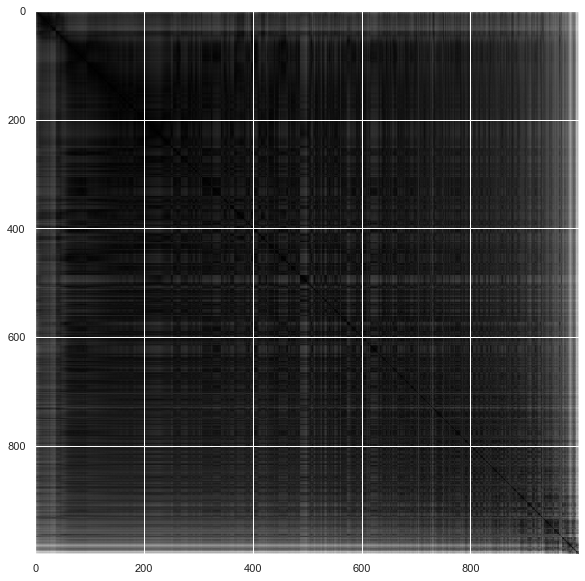

In [8]:
X_scale=sklearn.preprocessing.scale(variables_cuantitativas_normalizadas_muestra_mil)
pyclustertend.vat(X_scale)


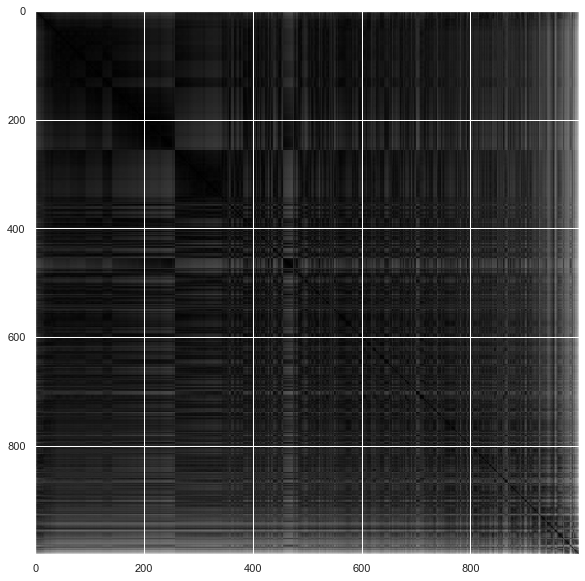

In [85]:
pyclustertend.vat(variables_cuantitativas_normalizadas_muestra_mil)


### Pregunta 3 : Determine cuál es el número de grupos a formar más adecuado para los datos que está trabajando. Haga una gráfica de codo y explique la razón de la elección de la cantidad de clústeres con la que trabajará.


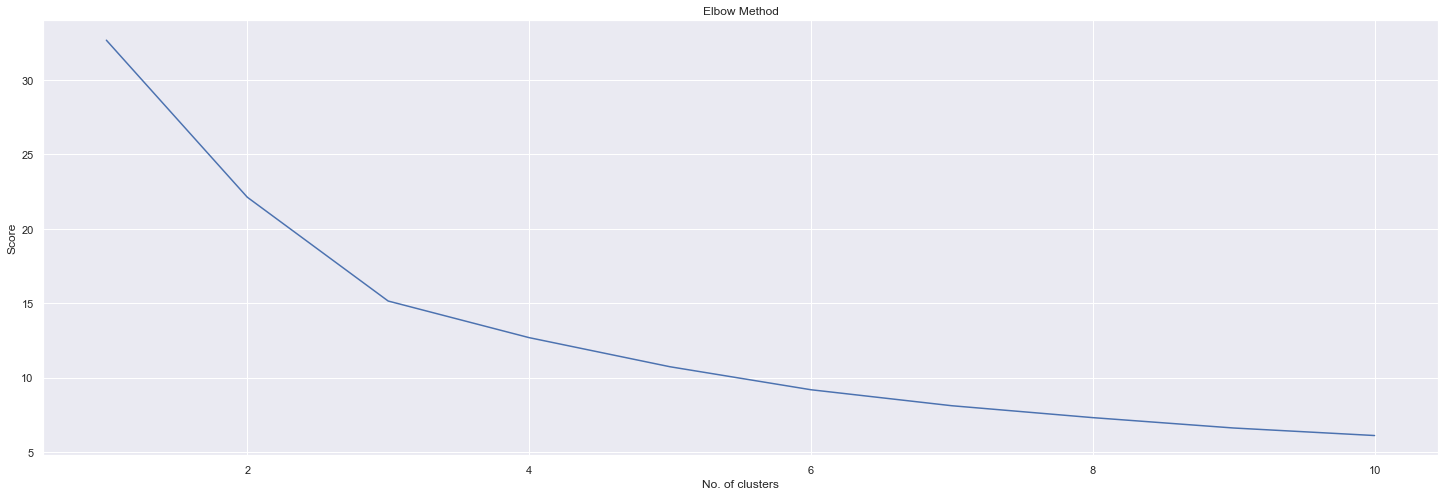

In [9]:
numeroClusters = range(1,11)
wcss = []
for i in numeroClusters:
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(variables_cuantitativas_normalizadas_muestra_mil)
    wcss.append(kmeans.inertia_)

plt.plot(numeroClusters, wcss)
plt.xlabel("No. of clusters")
plt.ylabel("Score")
plt.title("Elbow Method")
plt.show()

**El número de clusters que se acerca bastante es 3.**

### Pregunta 4: Utilice 3 algoritmos existentes para agrupamiento. Compare los resultados generados por cada uno.

#### KMeans

reference: example done in class

In [10]:
X_scale=sklearn.preprocessing.scale(variables_cuantitativas_normalizadas_muestra_mil)

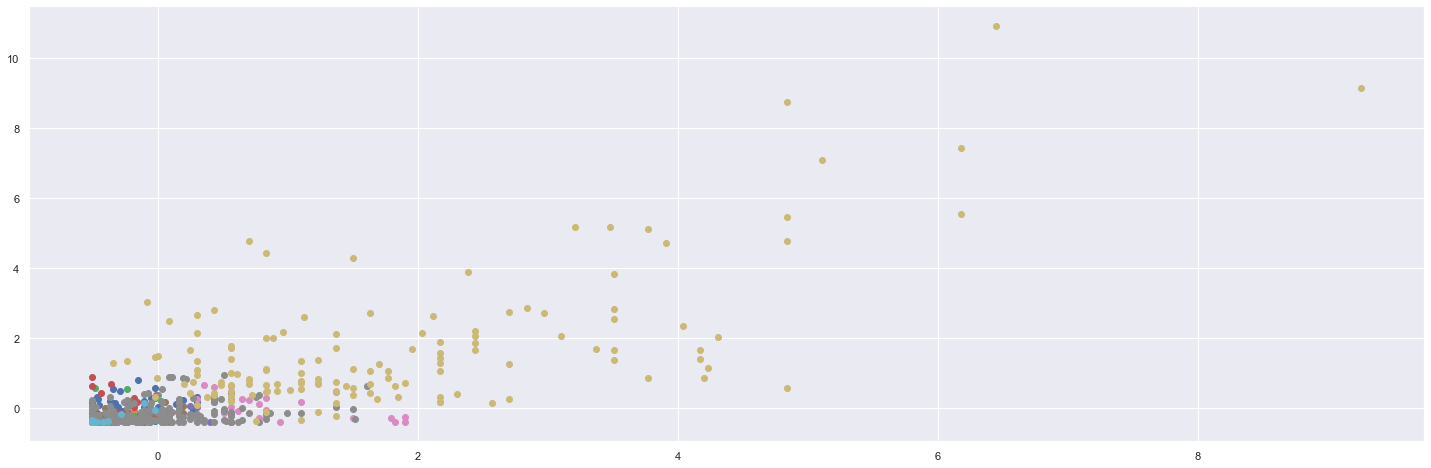

In [11]:
kmeans_result = kmeans.predict(X_scale)
kmeans_clusters = np.unique(kmeans_result)
for kmeans_cluster in kmeans_clusters:
    # get data points that fall in this cluster
    index = np.where(kmeans_result == kmeans_cluster)
    # make the plot
    plt.scatter(X_scale[index, 0], X_scale[index, 1], )
plt.show()

#### Balanced Iterative Reducing and Clustering using Hierarchies (BIRCH)

reference: https://www.geeksforgeeks.org/ml-birch-clustering/

In [12]:
# Import required libraries and modules
import matplotlib.pyplot as plt
from sklearn.cluster import Birch

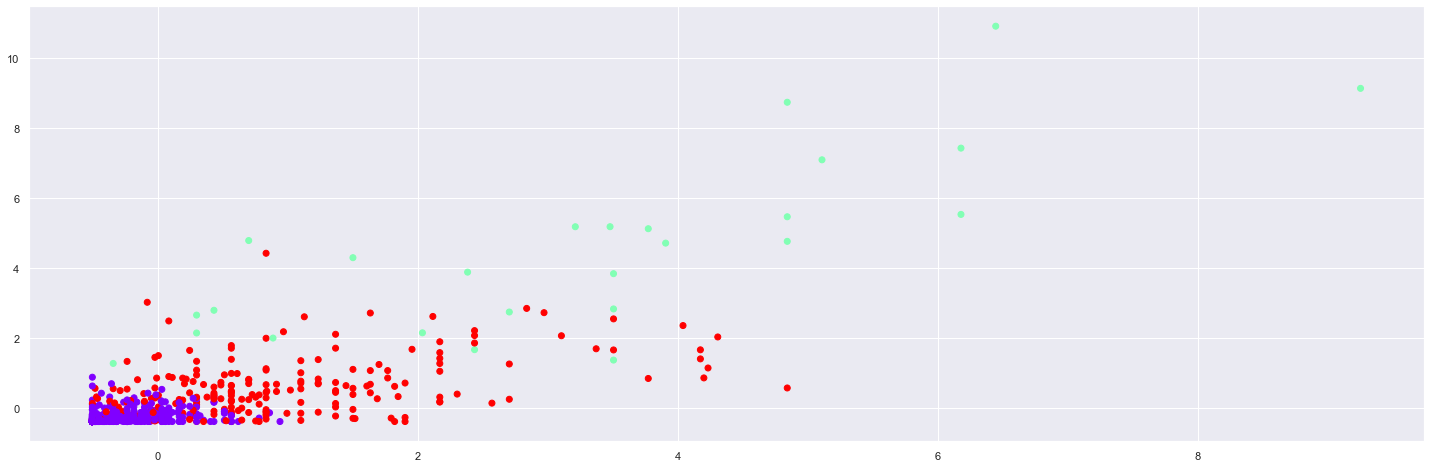

In [13]:
# Create a Birch object and fit the data to it
model = Birch(branching_factor = 50, n_clusters = 3, threshold = 0.03)
model.fit(X_scale)
# Get cluster labels
result = model.predict(X_scale)
# Get centroids
plt.scatter(X_scale[:,0], X_scale[:,1], c = result, cmap = 'rainbow')
plt.show()

#### Fuzzy-C-Means
reference: https://github.com/omadson/fuzzy-c-means

In [14]:
%matplotlib inline
import numpy as np
from fcmeans import FCM
from matplotlib import pyplot as plt

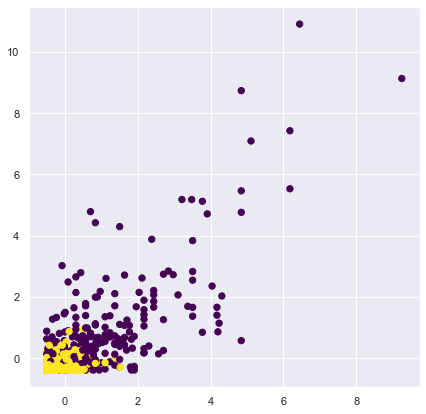

In [15]:
#fitting the fuzzy-c-means
fcm = FCM(n_clusters=2)
fcm.fit(X_scale)

# outputs
fcm_centers = fcm.centers
fcm_labels = fcm.predict(X_scale)
# plotting
fig, ax = plt.subplots(figsize=(7,7)) 
plt.scatter(X_scale[:, 0], X_scale[:, 1], c=fcm_labels, s=40,cmap="viridis");

### Pregunta 5: Determine la calidad del agrupamiento hecho por cada algoritmo con el método de la silueta. Discuta los resultados.

Se realiza el método de la silueta para determinar la calidad del agrupamiento de los datos. El coeficiente de la silueta va de -1 a 1, en donde un valor cercano a 1 indica que los clusters estan separados por lo que es un buen clustering. A continuacion se hace para los 3 metodos de agrupamiento realizados anteriormente.

For n_clusters = 2 The average silhouette_score is : 0.6169116418726849
For n_clusters = 2 The average silhouette_score is : 0.38123735160927263
For n_clusters = 3 The average silhouette_score is : 0.3203985667288883


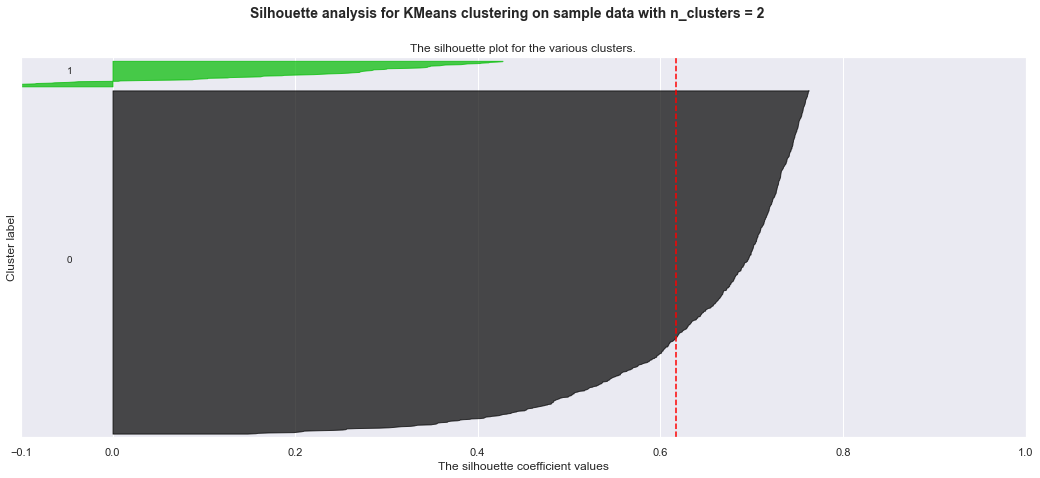

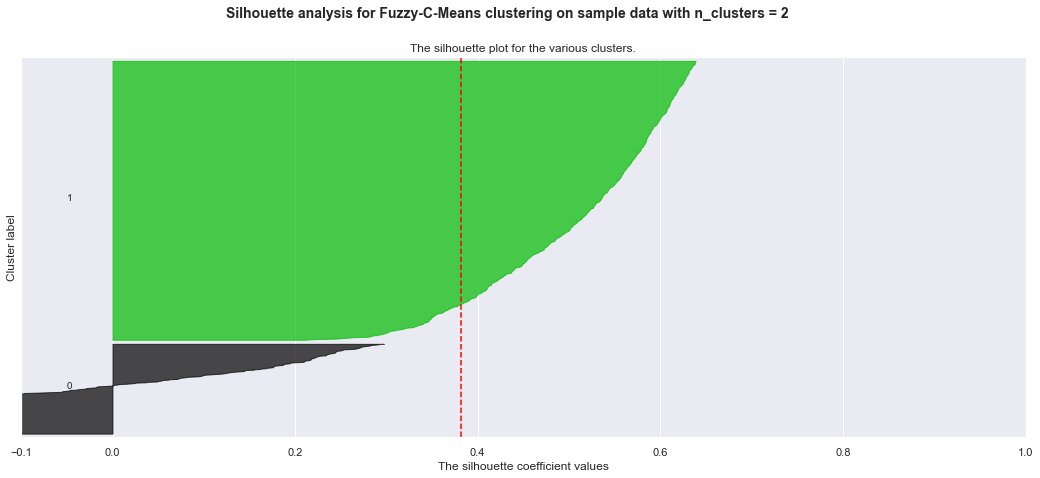

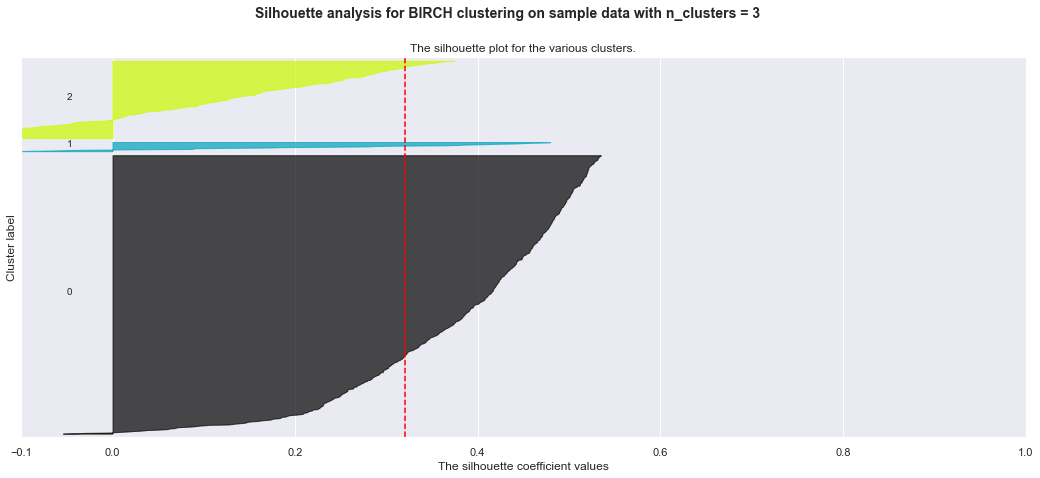

In [16]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

n_clusters = 2
clusterer = KMeans(n_clusters=n_clusters)
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(18, 7)

ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(X_scale) + (n_clusters + 1) * 10])

cluster_labels = clusterer.fit_predict(X_scale)

silhouette_avg = silhouette_score(X_scale, cluster_labels)
print(
    "For n_clusters =",
    n_clusters,
    "The average silhouette_score is :",
    silhouette_avg,
)

sample_silhouette_values = silhouette_samples(X_scale, cluster_labels)

y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10 

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


plt.suptitle(
    "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
    % n_clusters,
    fontsize=14,
    fontweight="bold",
)


n_clusters = 2
clusterer = fcm
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(18, 7)

ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(X_scale) + (n_clusters + 1) * 10])

cluster_labels = fcm_labels

silhouette_avg = silhouette_score(X_scale, cluster_labels)
print(
    "For n_clusters =",
    n_clusters,
    "The average silhouette_score is :",
    silhouette_avg,
)

sample_silhouette_values = silhouette_samples(X_scale, cluster_labels)

y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10 

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


plt.suptitle(
    "Silhouette analysis for Fuzzy-C-Means clustering on sample data with n_clusters = %d"
    % n_clusters,
    fontsize=14,
    fontweight="bold",
)

n_clusters = 3
clusterer = model
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(18, 7)

ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(X_scale) + (n_clusters + 1) * 10])

cluster_labels = clusterer.fit_predict(X_scale)

silhouette_avg = silhouette_score(X_scale, cluster_labels)
print(
    "For n_clusters =",
    n_clusters,
    "The average silhouette_score is :",
    silhouette_avg,
)

sample_silhouette_values = silhouette_samples(X_scale, cluster_labels)

y_lower = 10
for i in range(n_clusters):
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
    )

    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    y_lower = y_upper + 10 

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


plt.suptitle(
    "Silhouette analysis for BIRCH clustering on sample data with n_clusters = %d"
    % n_clusters,
    fontsize=14,
    fontweight="bold",
)

plt.show()



### Pregunta 6: Interprete  los  grupos  basado  en  el  conocimiento  que  tiene  de  los  datos.  Recuerde  investigar  las medidas de tendencia central de las variables continuas y las tablas de frecuencia de las variables categóricas pertenecientes a cada grupo. 
Identifique hallazgos interesantes debido a las agrupaciones y describa para qué le podría servir.

In [40]:
from sklearn.metrics import confusion_matrix

confusionKmeans = confusion_matrix(kmeans_result, np.array(movies[['budget']])[0:1000])
confusionBirch = confusion_matrix(result, np.array(movies[['budget']])[0:1000])
confusionFCM = confusion_matrix(fcm_labels,np.array(movies[['budget']])[0:1000])
print("CONFUSION KMEANS:",confusionKmeans)
print("CONFUSION BIRCH:",confusionBirch)
print("CONFUSION FCM:",confusionFCM)

CONFUSION KMEANS: [[3 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
CONFUSION BIRCH: [[65  0  0 ...  1  1  1]
 [ 1  0  0 ...  0  0  0]
 [25  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
CONFUSION FCM: [[25  0  0 ...  0  0  0]
 [66  0  1 ...  1  1  1]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  0  0  0]]
